In [18]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from keras import layers
from collections import Counter

In [28]:
df_volume = pd.read_csv('data\output.csv') # Path: data\output.csv
df_volume.dtypes


,SUBJECT_ID,CHARTTIME,VALUE,HAVEAKI
0,21,2134-09-11 23:00:00,3.333333,0
1,21,2134-09-12 00:00:00,6.666667,0
2,21,2134-09-12 01:00:00,10.000000,0
3,21,2134-09-12 02:00:00,10.000000,0
4,21,2134-09-12 03:00:00,0.000000,0


In [29]:
df_volume = df_volume.to_numpy()
#subject_id、尿量、ans
df_volume = np.array([df_volume[:,0], df_volume[:,2], df_volume[:,3]])
# 找出筆數大於等於36的病人
check = []
for key, val in Counter(df_volume[0]).items():
    if val >= 36:
        check.append(key)

# 病人後接上尿量、ans
Dictionary = {}
for i in range(len(df_volume[0])):
    if df_volume[0][i] in check:
        if df_volume[0][i] not in Dictionary:
            Dictionary[df_volume[0][i]] = [[df_volume[1][i], df_volume[2][i]]]
        else:
            Dictionary[df_volume[0][i]].append([df_volume[1][i], df_volume[2][i]])

def Filter1(x):
    li = []
    for i in x:
        li.append(int(i[0]))
    return li

#六小時內會有發生AKI output=1
def Filter2(x):
    li = []
    for i in x:
        li.append(i[1])
    for j in li:
        if j == 1:
            return 1
        else:
            return 0

data = []
ans = []
sequence_length = 36
for key, val in Dictionary.items():
    for index in range(len(val) - sequence_length):
        data.append(Filter1(val[index: index+sequence_length-6])) #1~30
        ans.append(Filter2(val[index+31: index+sequence_length]))

In [ ]:
#分割訓練集和測試集
data = np.array(data)
ans = np.array(ans)


X_train = data[:int(len(data)*0.8)]
X_test = data[int(len(data)*0.8):]
y_train = ans[:int(len(ans)*0.8)]
y_test = ans[int(len(ans)*0.8):]

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



In [32]:

#model
model = keras.Sequential()
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(train_data.shape[0], 1)))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


In [16]:


# model dir
model_dir = 'model/'
os.makedirs(model_dir, exist_ok=True)
log_dir = os.path.join(model_dir, 'logs', 'model_urine_1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + 'Best-model_urine_1.h5',
                                             monitor='val_accuracy',
                                             save_best_only=True,
                                             mode='max',
                                             early_stop=early_stop)

history = model_2.fit(train_data, train_ans,
                      batch_size=32,
                      epochs=200,
                      validation_data=(val_data, val_ans),
                      callbacks=[model_cbk, model_mckp])



Epoch 1/200
13393/13393 [==============================] - 126s 9ms/step - loss: 11509.4395 - accuracy: 0.0015 - val_loss: 9280.9775 - val_accuracy: 0.0016
Epoch 2/200
13393/13393 [==============================] - 122s 9ms/step - loss: 11509.3975 - accuracy: 0.0015 - val_loss: 9280.9775 - val_accuracy: 0.0016
Epoch 3/200
13393/13393 [==============================] - 120s 9ms/step - loss: 11509.3936 - accuracy: 0.0015 - val_loss: 9280.9775 - val_accuracy: 0.0016
Epoch 4/200
13393/13393 [==============================] - 121s 9ms/step - loss: 11509.4014 - accuracy: 0.0015 - val_loss: 9280.9775 - val_accuracy: 0.0016
Epoch 5/200
13393/13393 [==============================] - 119s 9ms/step - loss: 11509.3730 - accuracy: 0.0015 - val_loss: 9280.9775 - val_accuracy: 0.0016
Epoch 6/200
10235/13393 [=====================>........] - ETA: 27s - loss: 11525.2344 - accuracy: 0.0015

KeyboardInterrupt: 

In [90]:
 #混淆矩陣
from sklearn.metrics import confusion_matrix
from keras.utils import custom_object_scope

with custom_object_scope({'focal_loss_fixed': focal_loss()}):
    model = keras.models.load_model('model\Best-model_nosmote_4.h5')
    pred = model.predict(test_data)
    pred = np.where(pred > 0.5, 1, 0)
    cm = confusion_matrix(test_ans, pred)
    print(cm)


1712/1712 [==============================] - 14s 8ms/step
[[44440     0]
 [10330     0]]


In [94]:
 #混淆矩陣
from sklearn.metrics import confusion_matrix


model = keras.models.load_model('model\Best-model_nosmote_5.h5')
pred = model.predict(test_data)
pred = np.where(pred > 0.5, 1, 0)
cm = confusion_matrix(test_ans, pred)
print(cm)

1712/1712 [==============================] - 9s 5ms/step
[[44161   279]
 [10251    79]]


In [ ]:
#draw acc and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [96]:
model.load_weights('model\Best-model_nosmote_5.h5')
loss, acc = model.evaluate(test_data, test_ans)
print('Test loss: %.4f' % loss)
print('Test accuracy: %.4f' % acc)


1712/1712 [==============================] - 10s 5ms/step - loss: 0.1912 - accuracy: 0.8077
Test loss: 0.1912
Test accuracy: 0.8077


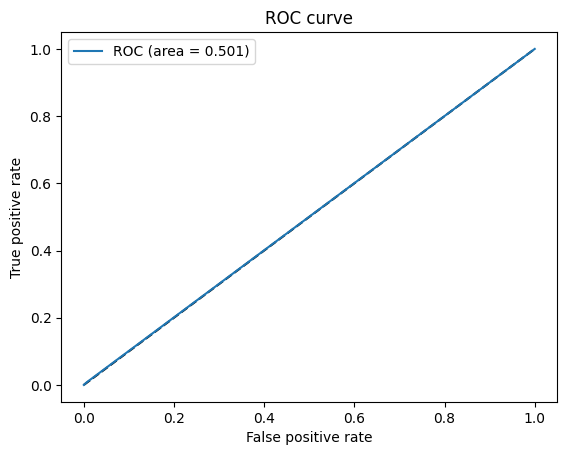

In [97]:
#ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(test_ans, pred)
auc = auc(fpr, tpr)
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

